## Preenchimento dos dados NaN + EDA (Exploratory Data Analysis)
Criar arquivos "marketok", "portifolio1ok", "portifolio2ok" e "portifolio3ok" com os features que possuem menos de 32% de dados faltantes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import missingno as msno

## Dados de Portifolio, trata-se de um determinado nicho de soluções.

In [3]:
df = pd.read_csv('portfolio3ok.csv', index_col=0)
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,...,PINDARE,True,NaN,NaN,NaN,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",141308380.0,144348380.0,2
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,BAIXO PARNAIBA PIAUIENSE,True,2.0,2.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",27818640.0,27818640.0,0
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380822,> 20,False,...,MANAUS,True,NaN,NaN,NaN,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",92728800.0,92728800.0,0
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854795,> 20,False,...,VALENCA DO PIAUI,True,NaN,NaN,NaN,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",24418584.0,24418584.0,0
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,...,BAIXA VERDE,True,NaN,NaN,NaN,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",38585484.0,38585484.0,1


In [4]:
# removendo 'qt_socios_pj', 'qt_socios_pf', 'qt_socios', pois há muitos dados faltantes, 
#não há como prever seu campo e influenciam pouco no mercado.
df = df.drop(columns=['qt_socios_pj', 'qt_socios_pf', 'qt_socios'])
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,...,False,644.27,OESTE MARANHENSE,PINDARE,True,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",141308380.0,144348380.0,2
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,False,688.31,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",27818640.0,27818640.0,0
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380822,> 20,False,...,False,1881.35,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",92728800.0,92728800.0,0
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854795,> 20,False,...,False,353.66,CENTRO NORTE PIAUIENSE,VALENCA DO PIAUI,True,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",24418584.0,24418584.0,0
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,...,False,NaN,AGRESTE POTIGUAR,BAIXA VERDE,True,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",38585484.0,38585484.0,1


In [5]:
df.shape

(265, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 43 columns):
id                                       265 non-null object
fl_matriz                                265 non-null bool
de_natureza_juridica                     265 non-null object
sg_uf                                    265 non-null object
natureza_juridica_macro                  265 non-null object
de_ramo                                  265 non-null object
setor                                    265 non-null object
idade_empresa_anos                       265 non-null float64
idade_emp_cat                            265 non-null object
fl_me                                    265 non-null bool
fl_sa                                    265 non-null bool
fl_epp                                   265 non-null bool
fl_mei                                   265 non-null bool
fl_ltda                                  265 non-null bool
dt_situacao                              265 non-nul

# Avaliação de dados faltantes

### Percebe-se que este portifolio possui um elevado número de dados faltantes.

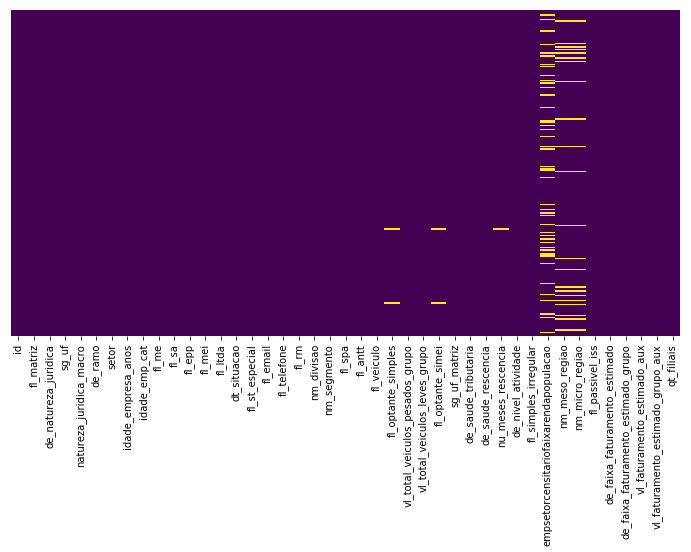

In [7]:
# plot dados faltantes geral
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

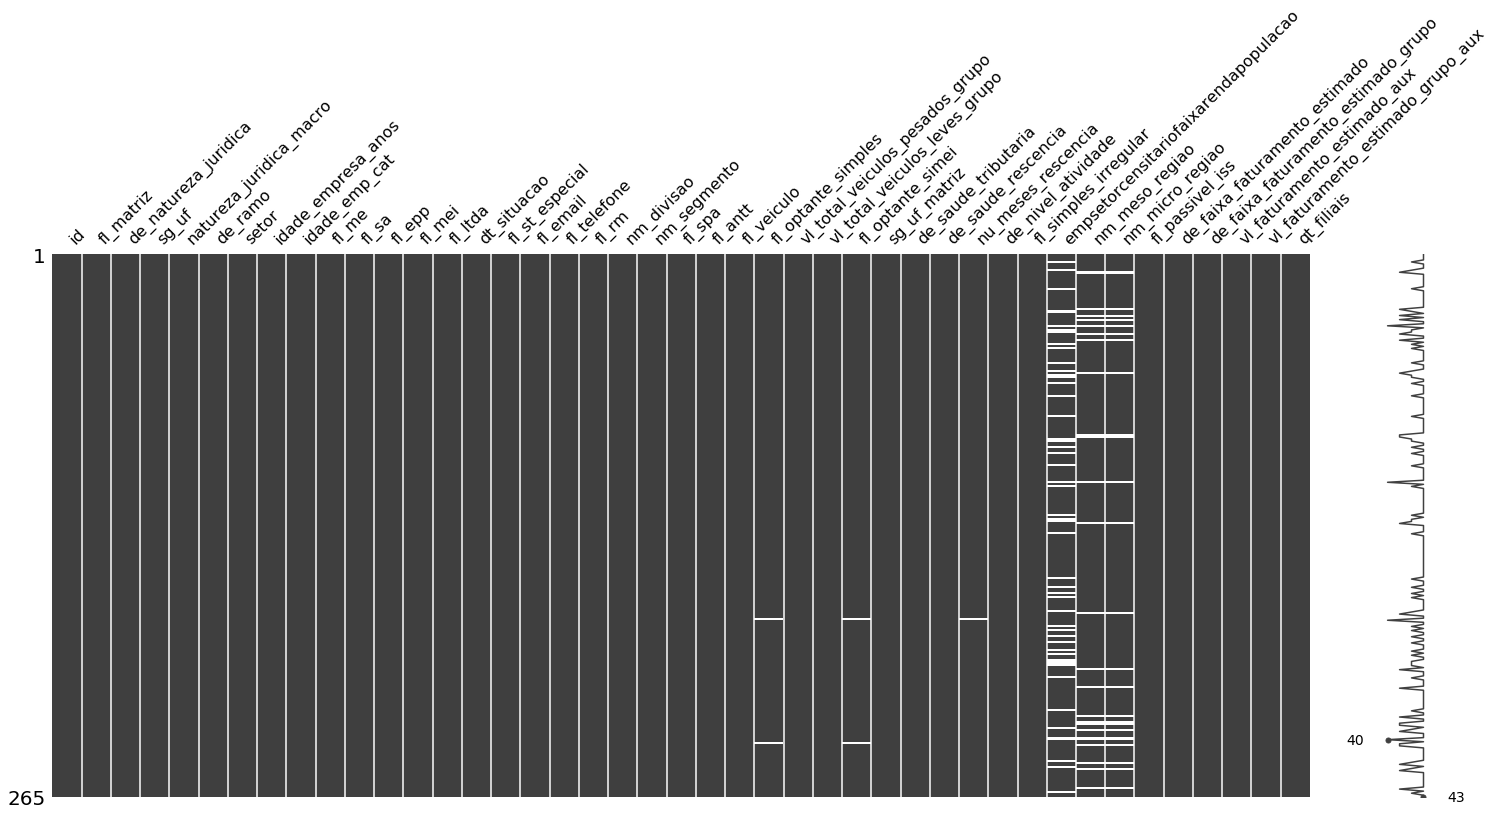

In [8]:
# plot dados faltantes geral
msno.matrix(df)

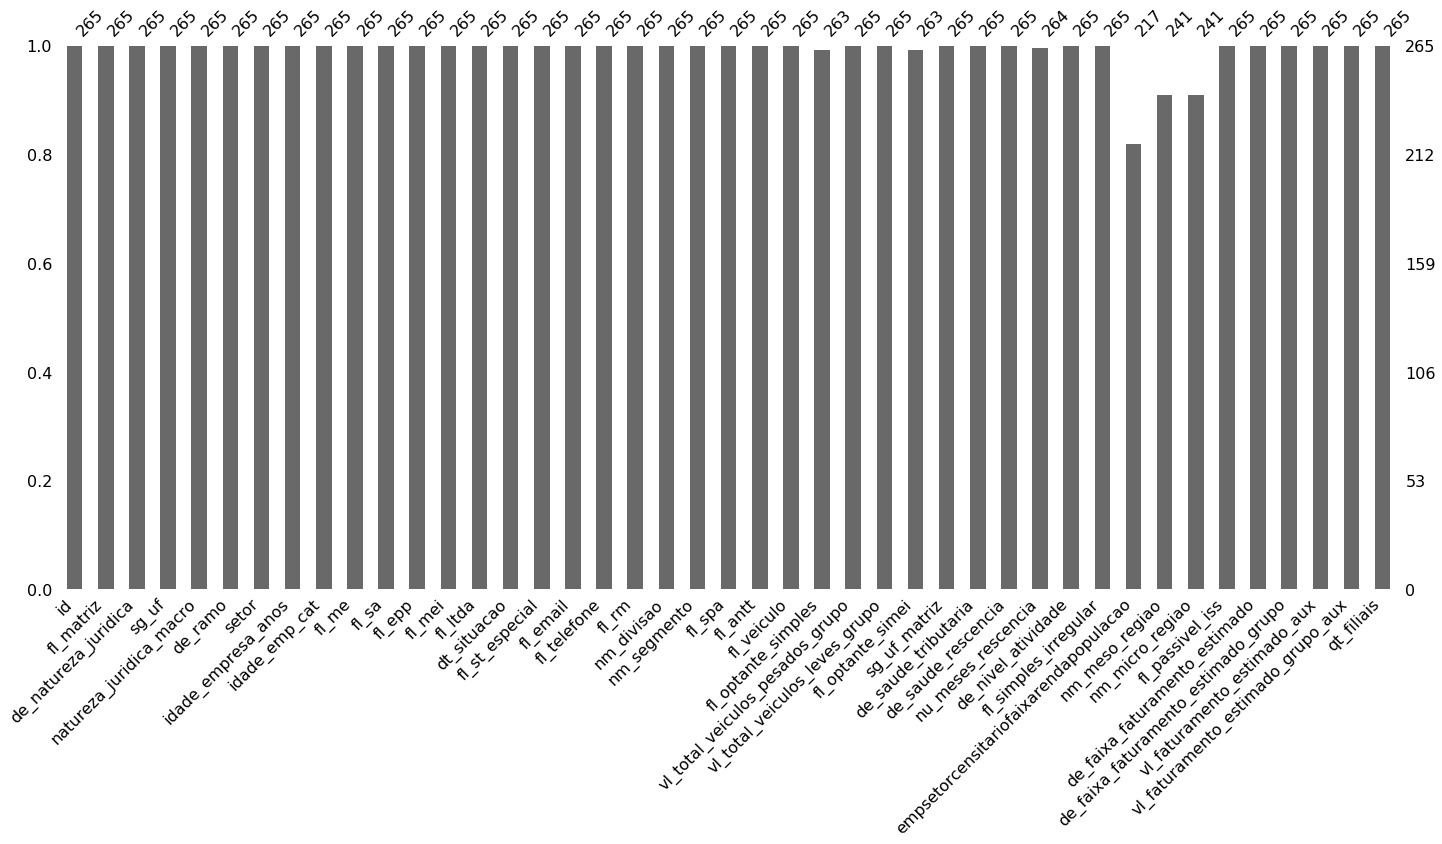

In [9]:
# plot dados faltantes geral
msno.bar(df)

In [10]:
# checkin what is numerical features
num_feat = df.select_dtypes(include=[np.number])
num_feat.columns

Index(['idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'vl_faturamento_estimado_aux',
       'vl_faturamento_estimado_grupo_aux', 'qt_filiais'],
      dtype='object')

In [11]:
# checkin what is categorical features
cat_feat = df.select_dtypes(include=[np.object])
cat_feat.columns

Index(['id', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'dt_situacao', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_optante_simples', 'fl_optante_simei',
       'sg_uf_matriz', 'de_saude_tributaria', 'de_saude_rescencia',
       'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

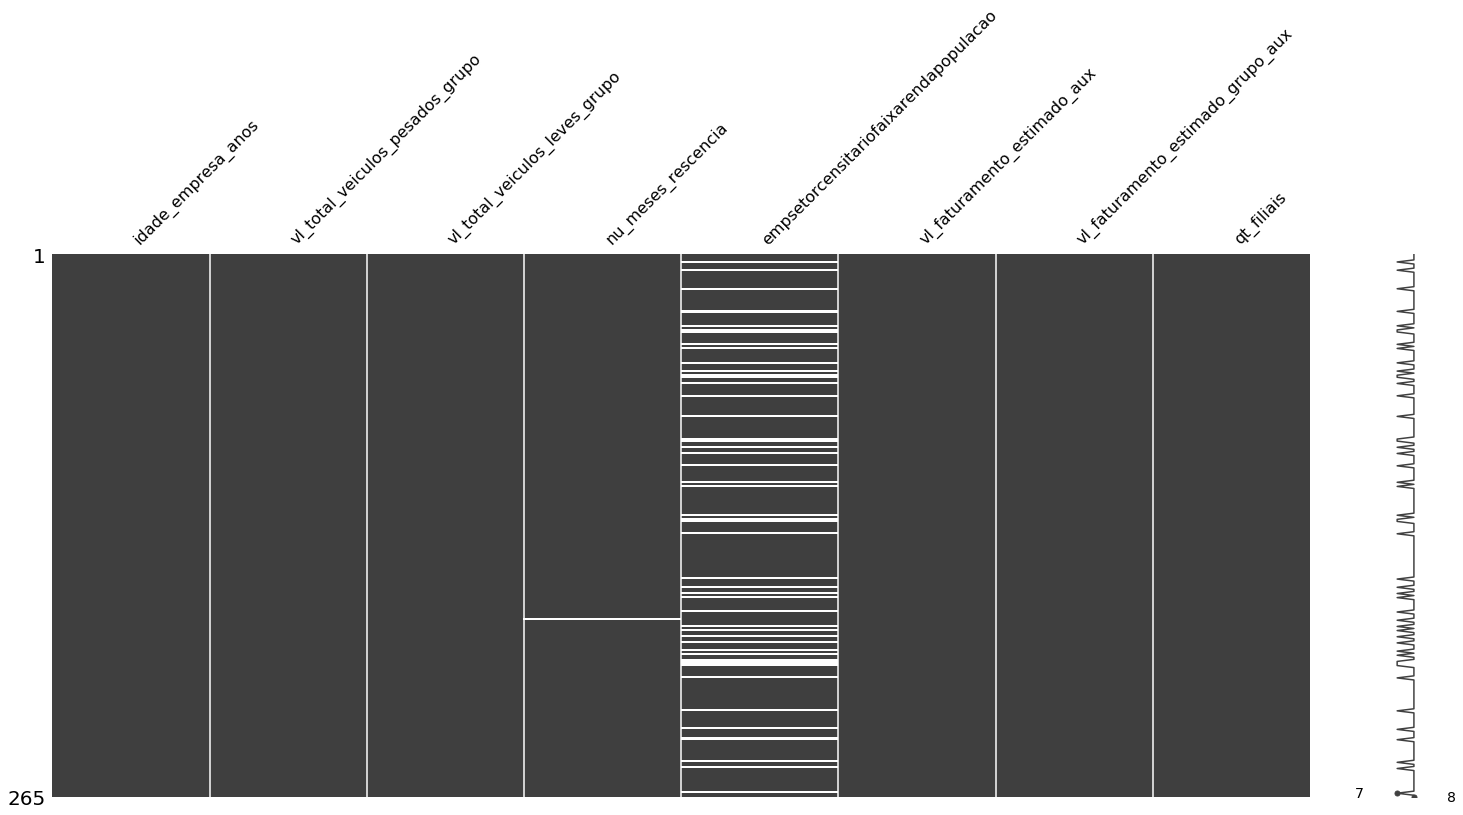

In [12]:
# plot dados faltantes para os features numericos
msno.matrix(num_feat)

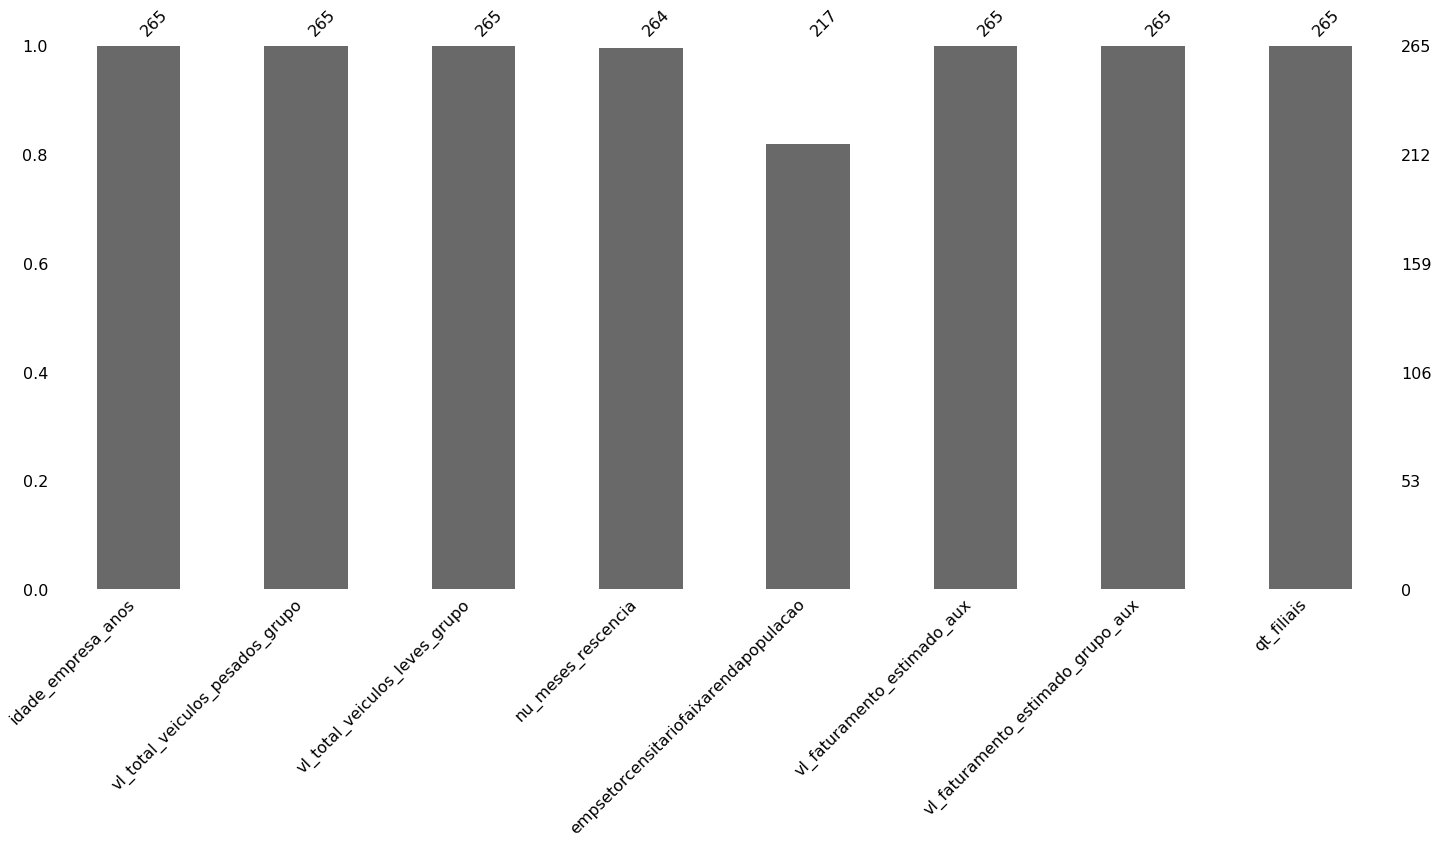

In [13]:
# plot dados faltantes para os features numericos
msno.bar(num_feat)

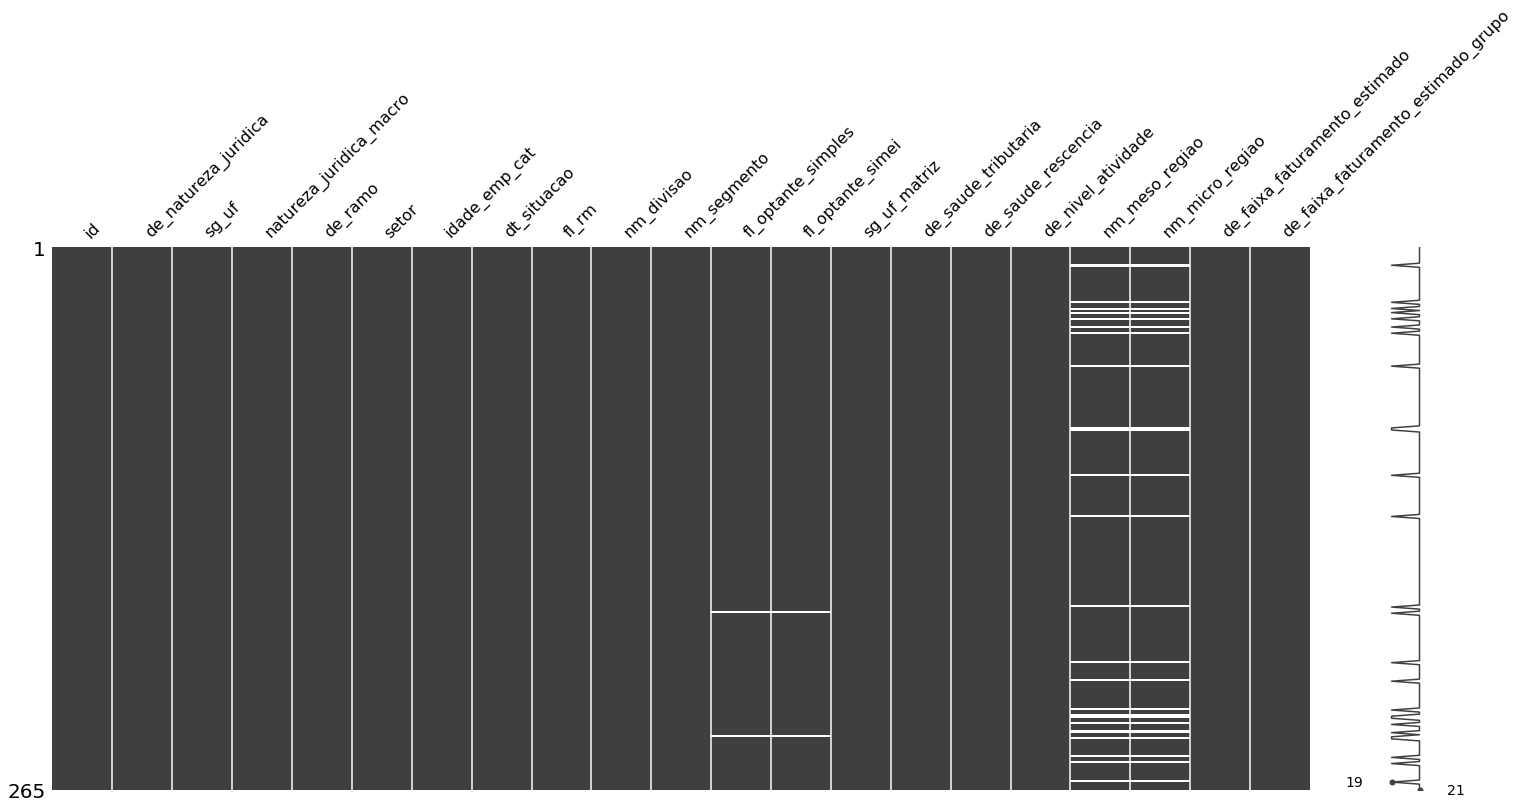

In [14]:
# plot dados faltantes para os features categoricos
msno.matrix(cat_feat)

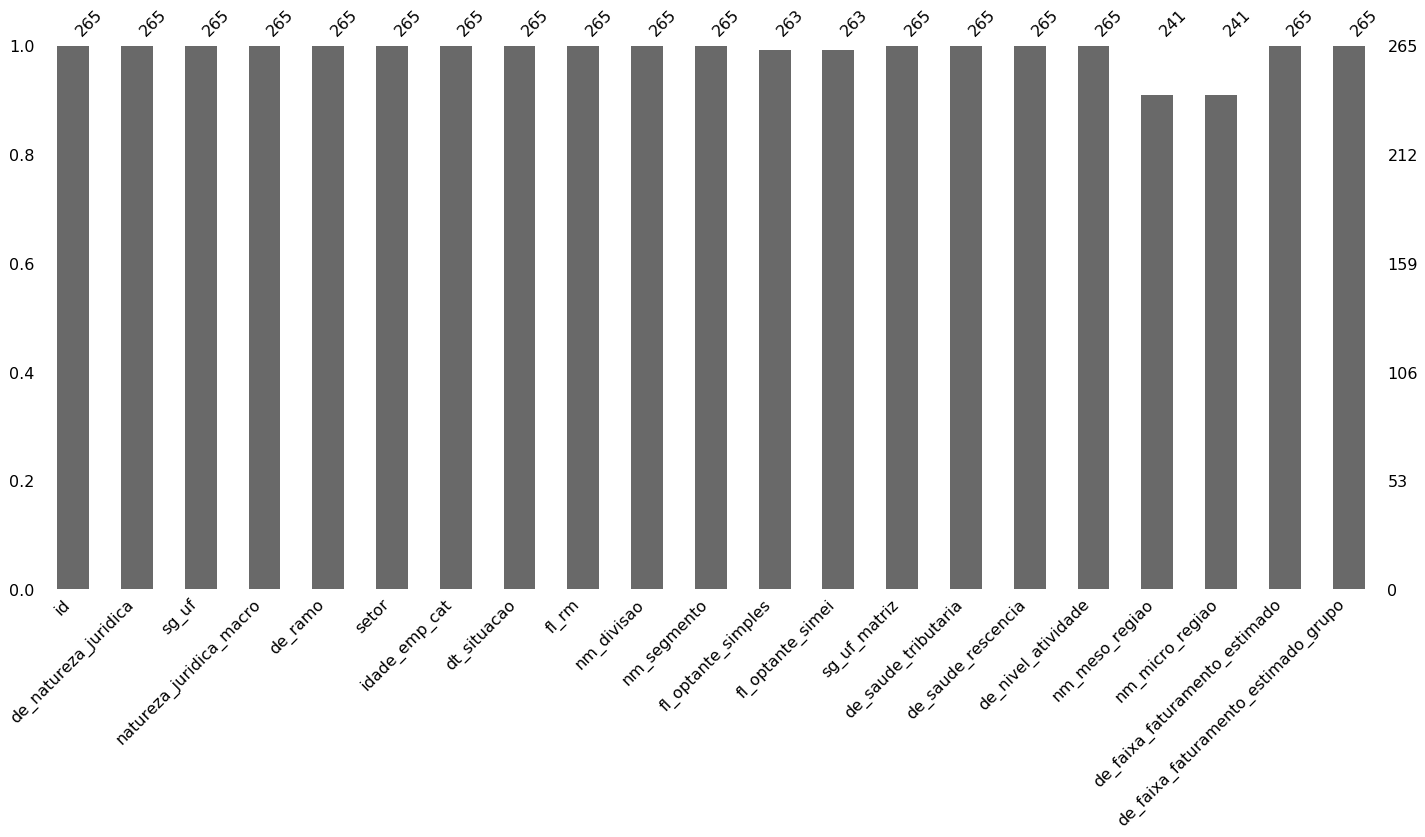

In [15]:
# plot dados faltantes para os features categoricos
msno.bar(cat_feat)

## Quantificando dados faltantes
#### entre numericos e categoricos

In [16]:
total_num_feat = num_feat.isnull().sum().sort_values(ascending=False)
total_num_feat.sum()

49

In [17]:
percent_num_feat = (num_feat.isnull().sum()/num_feat.isnull().count()).sort_values(ascending=False)
round(percent_num_feat.sum(), 2)

0.18

In [18]:
missing_data_num_feat = pd.concat([total_num_feat, percent_num_feat], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data_num_feat.index.name ='features'
missing_data_num_feat.head(5)

,Total_Missing_Count,Percent_of_Missing
features,,
empsetorcensitariofaixarendapopulacao,48,0.181132
nu_meses_rescencia,1,0.003774
qt_filiais,0,0.000000
vl_faturamento_estimado_grupo_aux,0,0.000000
vl_faturamento_estimado_aux,0,0.000000


In [19]:
total_cat_feat = cat_feat.isnull().sum().sort_values(ascending=False)
total_cat_feat.sum()

52

In [20]:
percent_cat_feat = (cat_feat.isnull().sum()/cat_feat.isnull().count()).sort_values(ascending=False)
round(percent_cat_feat.sum(), 2)

0.2

In [52]:
missing_data_cat_feat = pd.concat([total_cat_feat, percent_cat_feat], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data_cat_feat.index.name ='features'
missing_data_cat_feat.head(6)

,Total_Missing_Count,Percent_of_Missing
features,,
nm_micro_regiao,24,0.090566
nm_meso_regiao,24,0.090566
fl_optante_simei,2,0.007547
fl_optante_simples,2,0.007547
de_faixa_faturamento_estimado_grupo,0,0.000000
dt_situacao,0,0.000000


# Preenchendo dados faltantes

#### Itens que serão preenchidos - Numéricos

In [22]:
# empsetorcensitariofaixarendapopulacao	150	0.270270
# inferir utilizando a média deste campo e com mesma localidade (nm_meso_regiao ou nm_micro_regiao)
# empsetorcensitariofaixarendapopulacao: numeric, average income from a sample
# of residents in a census unity (smallest territory area according to IBGE).

In [23]:
# nu_meses_rescencia	47	0.084685
# utilizar media dos demais
# nu_meses_rescencia:character, number of months since the last update of the most 
# lagged input from saude_tributaria

In [24]:
# vl_faturamento_estimado_grupo_aux	25	0.045045
# inferir utilizando a média deste campo e com mesmo faturamento grupo (de_faixa_faturamento_estimado_grupo)

In [25]:
# vl_faturamento_estimado_aux	25	0.045045
# inferir utilizando a média deste campo e com mesmo faturamento (de_faixa_faturamento_estimado)

#### Itens que serão preenchidos - Categóricos

In [26]:
# fl_optante_simei	101	0.181982
# inferir utilizando a média deste campo e com mesmo faturamento (de_faixa_faturamento_estimado)

In [27]:
# fl_optante_simples	101	0.181982
# inferir utilizando a média deste campo e com mesmo faturamento (de_faixa_faturamento_estimado)

In [28]:
# nm_micro_regiao	64	0.115315
# inferir utilizando este campo e estado (sg_uf)

In [29]:
# nm_meso_regiao	64	0.115315
# inferir utilizando este campo e estado (sg_uf)

In [30]:
# de_faixa_faturamento_estimado_grupo	25	0.045045
# inferir usando...

In [31]:
# de_faixa_faturamento_estimado	25	0.045045
# inferir usando...

In [32]:
# de_saude_rescencia	11	0.019820
# inferir usando...

In [33]:
# de_saude_tributaria	11	0.019820
# inferir usando...

In [34]:
# de_nivel_atividade	4	0.007207
# inferir usando...

# Avaliação do contexto

In [35]:
df.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda',
       'dt_situacao', 'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt', 'fl_veiculo',
       'fl_optante_simples', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia',
       'de_nivel_atividade', 'fl_simples_irregular',
       'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'vl_faturamento_estimado_grupo_aux', 'qt_filiais'],
      dtype='object')

In [36]:
df.fl_epp.unique()

array([False])

In [37]:
df.de_ramo.unique()

array(['ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL',
       'SERVICOS DE EDUCACAO', 'SERVICOS DE ALOJAMENTO/ALIMENTACAO',
       'SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS',
       'SERVICOS ADMINISTRATIVOS', 'SERVICOS DIVERSOS',
       'SERVICOS SOCIAIS', 'SERVICOS DE SAUDE',
       'TRANSPORTE, ARMAZENAGEM E CORREIO',
       'SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE',
       'SERVICOS DE SANEAMENTO BASICO', 'CULTURA, ESPORTE E RECREACAO',
       'TELECOM', 'SERVICOS FINANCEIROS', 'ATIVIDADES IMOBILIARIAS',
       'INDUSTRIA DIGITAL'], dtype=object)

In [38]:
df.setor.unique()

array(['SERVIÇO'], dtype=object)

In [39]:
setores = pd.DataFrame(df.groupby('setor').count())
setores

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,...,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
setor,,,,,,,,,,,,,,,,,,,,,
SERVIÇO,265,265,265,265,265,265,265,265,265,265,...,265,217,241,241,265,265,265,265,265,265


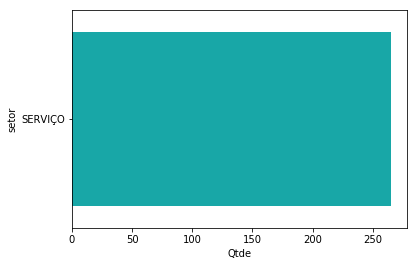

In [40]:
temp = pd.DataFrame({'setor':setores.index,'Qtde':setores.fl_matriz})
sns.barplot(x='Qtde',y="setor", data=temp, color="c");

In [41]:
df.de_natureza_juridica.unique()

array(['MUNICIPIO', 'SOCIEDADE SIMPLES LIMITADA',
       'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'ASSOCIACAO PRIVADA', 'EMPRESARIO INDIVIDUAL',
       'SOCIEDADE EMPRESARIA LIMITADA', 'FUNDACAO PRIVADA',
       'FUNDACAO PUB DE DIREITO PUB EST OU DO DF',
       'SERVICO SOCIAL AUTONOMO',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL',
       'AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL', 'COOPERATIVA',
       'SOCIEDADE DE ECONOMIA MISTA',
       'ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'FUNDO PUBLICO', 'FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL',
       'AUTARQUIA MUNICIPAL', 'AUTARQUIA FEDERAL',
       'ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL',
       'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL',
       'SOCIEDADE ANONIMA FECHADA', 'CONDOMINIO EDILICIO',
       'ENTIDADE SINDICAL', 'CONSORCIO DE SOCIEDADES'], dtype=object)

In [42]:
#df.groupby(['setor','de_natureza_juridica']).count().to_frame()

In [43]:
df.idade_emp_cat.unique()

array(['> 20', '15 a 20', '5 a 10', '10 a 15', '1 a 5', '<= 1'],
      dtype=object)

In [44]:
df.idade_empresa_anos.head(10)

0    21.813699
1    16.389041
2    40.380822
3    43.854795
4    43.865753
5    47.087671
6    15.734247
7    26.520548
8     8.446575
9    11.035616
Name: idade_empresa_anos, dtype: float64

In [45]:
df.idade_empresa_anos.mean()

27.762501938485386

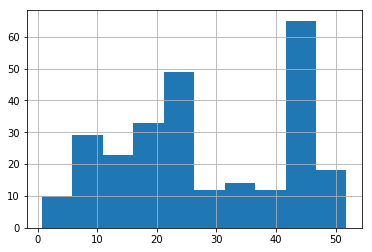

In [46]:
df.idade_empresa_anos.hist()

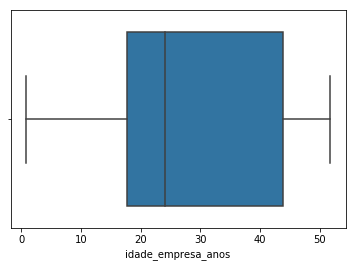

In [47]:
sns.boxplot(df.idade_empresa_anos)

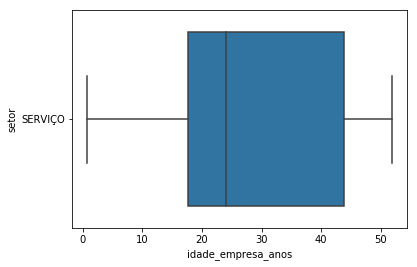

In [48]:
sns.boxplot(x='idade_empresa_anos', y='setor', data=df)

In [49]:
de_faixa_fatur_est = pd.DataFrame(df.groupby('de_faixa_faturamento_estimado').count())
de_faixa_fatur_est

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
de_faixa_faturamento_estimado,,,,,,,,,,,,,,,,,,,,,
ACIMA DE 1 BILHAO DE REAIS,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"DE R$ 10.000.000,01 A R$ 30.000.000,00",61,61,61,61,61,61,61,61,61,61,...,61,61,52,54,54,61,61,61,61,61
"DE R$ 100.000.000,01 A R$ 300.000.000,00",49,49,49,49,49,49,49,49,49,49,...,49,49,44,47,47,49,49,49,49,49
"DE R$ 30.000.000,01 A R$ 100.000.000,00",138,138,138,138,138,138,138,138,138,138,...,138,138,106,125,125,138,138,138,138,138
"DE R$ 300.000.000,01 A R$ 500.000.000,00",9,9,9,9,9,9,9,9,9,9,...,9,9,8,9,9,9,9,9,9,9
"DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",6,6,6,6,6,6,6,6,6,6,...,6,6,5,4,4,6,6,6,6,6


In [50]:
de_faixa_fatur_est = pd.DataFrame(df.groupby('de_faixa_faturamento_estimado').count())
de_faixa_fatur_est

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
de_faixa_faturamento_estimado,,,,,,,,,,,,,,,,,,,,,
ACIMA DE 1 BILHAO DE REAIS,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"DE R$ 10.000.000,01 A R$ 30.000.000,00",61,61,61,61,61,61,61,61,61,61,...,61,61,52,54,54,61,61,61,61,61
"DE R$ 100.000.000,01 A R$ 300.000.000,00",49,49,49,49,49,49,49,49,49,49,...,49,49,44,47,47,49,49,49,49,49
"DE R$ 30.000.000,01 A R$ 100.000.000,00",138,138,138,138,138,138,138,138,138,138,...,138,138,106,125,125,138,138,138,138,138
"DE R$ 300.000.000,01 A R$ 500.000.000,00",9,9,9,9,9,9,9,9,9,9,...,9,9,8,9,9,9,9,9,9,9
"DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",6,6,6,6,6,6,6,6,6,6,...,6,6,5,4,4,6,6,6,6,6
